In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

In [3]:
all_step_nums_and_vals = {}

In [4]:
exp_names = ['1k', '4k', '16k', '32k', '65k', '131k']
num_datas = [1024, 4096, 16384, 32768, 65536, 131072]

for i, exp_name in enumerate(exp_names):
    event_acc = EventAccumulator(f'/scratch/yy2694/mae/exp_{exp_name}')
    event_acc.Reload()

    num_data = num_datas[i]
    batch_size = 256
    train_losses = event_acc.Scalars('train_loss')
    epoch_nums = [train_losses[i].step for i in range(len(train_losses))]
    step_nums = [train_losses[i].step / 1000 * num_data / batch_size for i in range(len(train_losses))]
    vals = [train_losses[i].value for i in range(len(train_losses))]

    all_step_nums_and_vals[exp_name] = (epoch_nums, step_nums, vals)

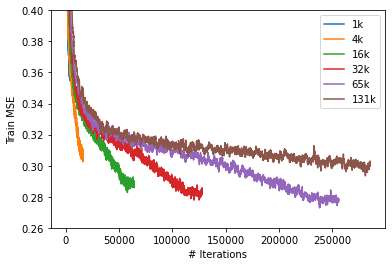

In [11]:
for exp_name, (epoch_nums, step_nums, vals) in all_step_nums_and_vals.items():
    plt.plot(step_nums, smooth(vals, 0.95), label=exp_name)
plt.ylim(0.26, 0.4)
plt.xlabel('# Iterations')
plt.ylabel('Train MSE')
plt.legend()

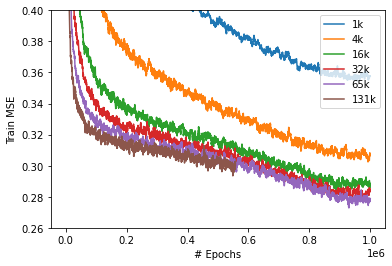

In [10]:
for exp_name, (epoch_nums, step_nums, vals) in all_step_nums_and_vals.items():
    plt.plot(epoch_nums, smooth(vals, 0.95), label=exp_name)
plt.ylim(0.26, 0.4)
plt.xlabel('# Epochs')
plt.ylabel('Train MSE')
plt.legend()